In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Zomato Dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37503 entries, 0 to 37502
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           37503 non-null  object 
 1   Delivery_person_ID           37502 non-null  object 
 2   Delivery_person_Age          35990 non-null  float64
 3   Delivery_person_Ratings      35944 non-null  float64
 4   Restaurant_latitude          37502 non-null  float64
 5   Restaurant_longitude         37502 non-null  float64
 6   Delivery_location_latitude   37502 non-null  float64
 7   Delivery_location_longitude  37502 non-null  float64
 8   Order_Date                   37502 non-null  object 
 9   Time_Orderd                  36086 non-null  object 
 10  Time_Order_picked            37502 non-null  object 
 11  Weather_conditions           37002 non-null  object 
 12  Road_traffic_density         37014 non-null  object 
 13  Vehicle_conditio

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2.0,Snack,motorcycle,3.0,No,Metropolitian,46.0
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1.0,Meal,motorcycle,1.0,No,Metropolitian,23.0
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,21.0
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0.0,Buffet,motorcycle,0.0,No,Metropolitian,20.0
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1.0,Snack,scooter,1.0,No,Metropolitian,41.0


# Data Preprocessing

In [ ]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,1
Delivery_person_Age,1513
Delivery_person_Ratings,1559
Restaurant_latitude,1
Restaurant_longitude,1
Delivery_location_latitude,1
Delivery_location_longitude,1
Order_Date,1
Time_Orderd,1417


In [ ]:
# handling missing values
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-2785849733.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipython-input-2785849733.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37503 entries, 0 to 37502
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           37503 non-null  object        
 1   Delivery_person_ID           37503 non-null  object        
 2   Delivery_person_Age          37503 non-null  float64       
 3   Delivery_person_Ratings      37503 non-null  float64       
 4   Restaurant_latitude          37503 non-null  float64       
 5   Restaurant_longitude         37503 non-null  float64       
 6   Delivery_location_latitude   37503 non-null  float64       
 7   Delivery_location_longitude  37503 non-null  float64       
 8   Order_Date                   17297 non-null  datetime64[ns]
 9   Time_Orderd                  37503 non-null  object        
 10  Time_Order_picked            37503 non-null  object        
 11  Weather_conditions           37503 non-nu

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,20206
Time_Orderd,0


In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,Jam,2.0,Snack,motorcycle,3.0,No,Metropolitian,46.0
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,NaT,14:55,15:05,Stormy,High,1.0,Meal,motorcycle,1.0,No,Metropolitian,23.0
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,21.0
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,NaT,09:20,09:30,Sandstorms,Low,0.0,Buffet,motorcycle,0.0,No,Metropolitian,20.0
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,NaT,19:50,20:05,Fog,Jam,1.0,Snack,scooter,1.0,No,Metropolitian,41.0


In [ ]:
median_date = df['Order_Date'].median()
df['Order_Date'].fillna(median_date, inplace=True)

/tmp/ipython-input-1574614580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Order_Date'].fillna(median_date, inplace=True)


In [ ]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37503 entries, 0 to 37502
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           37503 non-null  object        
 1   Delivery_person_ID           37503 non-null  object        
 2   Delivery_person_Age          37503 non-null  float64       
 3   Delivery_person_Ratings      37503 non-null  float64       
 4   Restaurant_latitude          37503 non-null  float64       
 5   Restaurant_longitude         37503 non-null  float64       
 6   Delivery_location_latitude   37503 non-null  float64       
 7   Delivery_location_longitude  37503 non-null  float64       
 8   Order_Date                   37503 non-null  datetime64[ns]
 9   Time_Orderd                  37503 non-null  object        
 10  Time_Order_picked            37503 non-null  object        
 11  Weather_conditions           37503 non-nu

# EDA awal

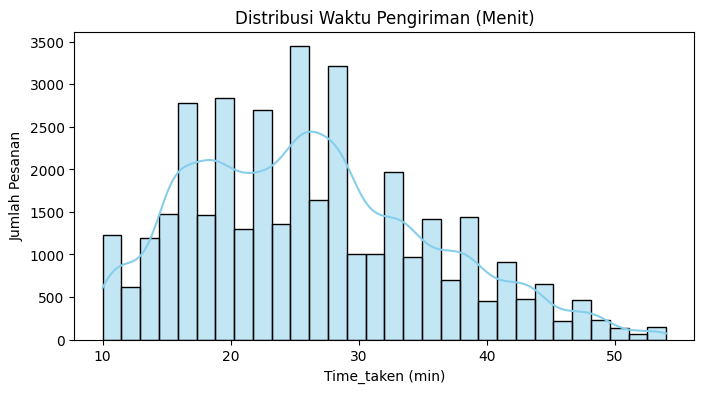

In [ ]:
# Distribusi waktu pengiriman
plt.figure(figsize=(8, 4))
sns.histplot(df['Time_taken (min)'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Waktu Pengiriman (Menit)')
plt.xlabel('Time_taken (min)')
plt.ylabel('Jumlah Pesanan')
plt.show()

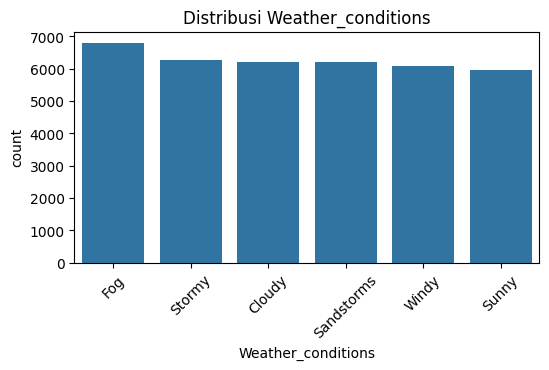

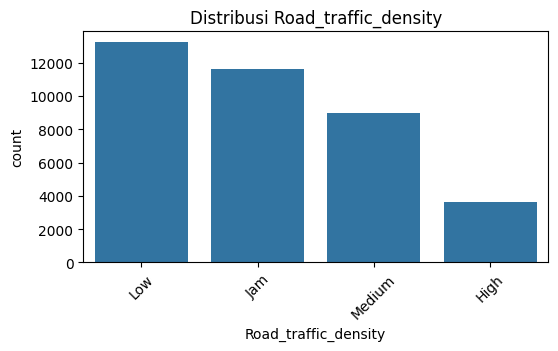

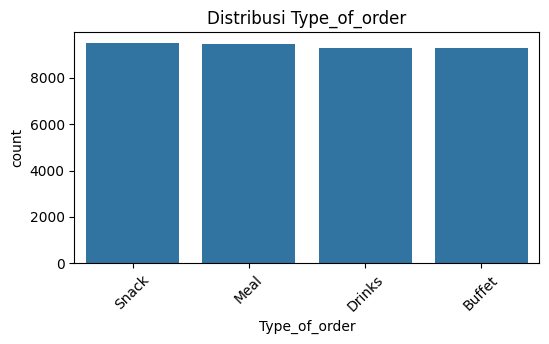

In [ ]:
for col in ['Weather_conditions', 'Road_traffic_density', 'Type_of_order']:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

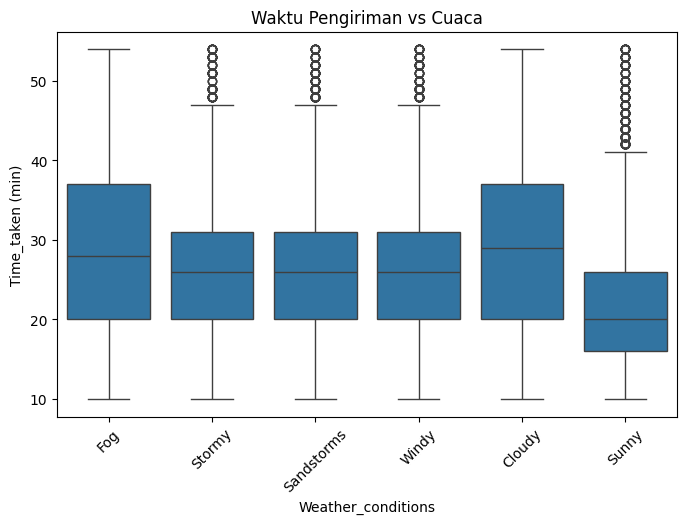

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Weather_conditions', y='Time_taken (min)', data=df)
plt.title('Waktu Pengiriman vs Cuaca')
plt.xticks(rotation=45)
plt.show()

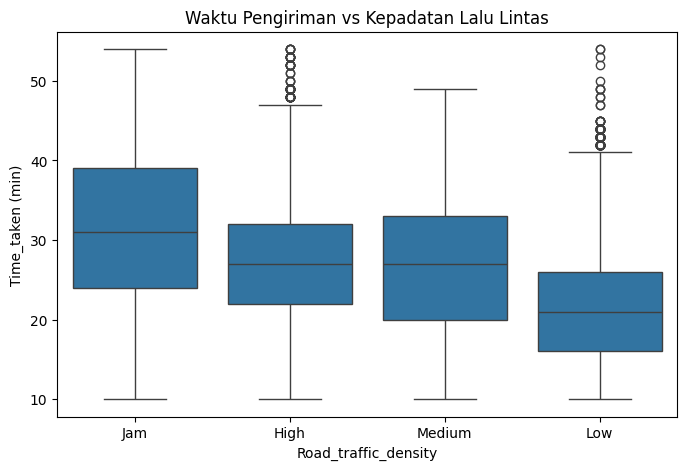

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Road_traffic_density', y='Time_taken (min)', data=df)
plt.title('Waktu Pengiriman vs Kepadatan Lalu Lintas')
plt.show()

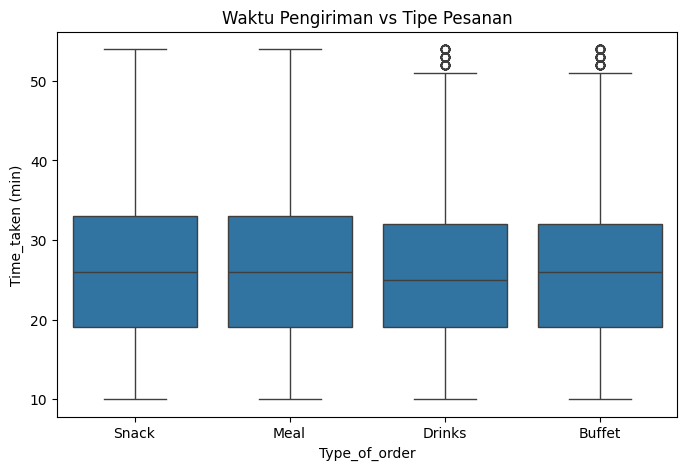

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type_of_order', y='Time_taken (min)', data=df)
plt.title('Waktu Pengiriman vs Tipe Pesanan')
plt.show()

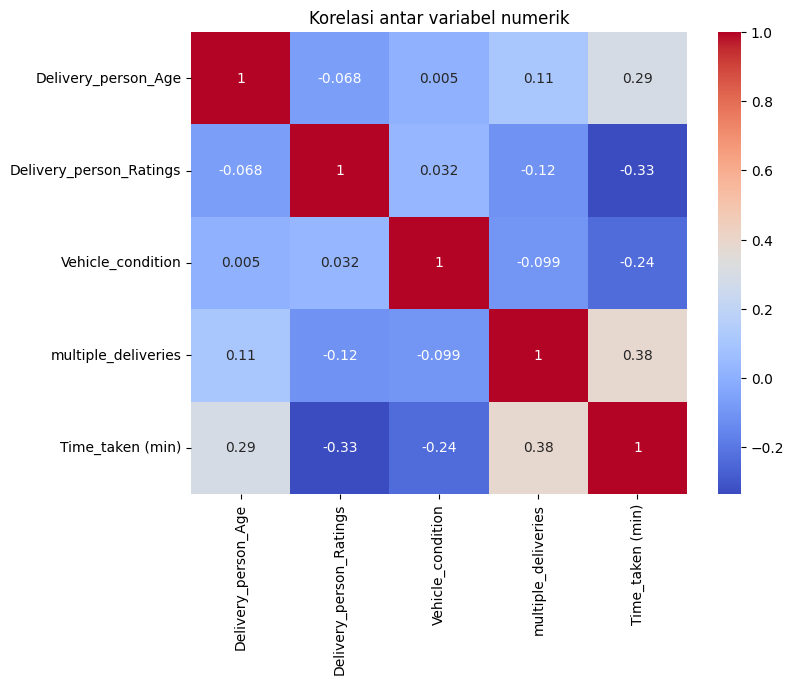

In [ ]:
numerik = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition', 'multiple_deliveries', 'Time_taken (min)']
plt.figure(figsize=(8,6))
sns.heatmap(df[numerik].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar variabel numerik')
plt.show()

- Waktu pengiriman cenderung lebih lama saat cuaca buruk seperti storm/fog.
- Traffic density tinggi (Jam) memperpanjang waktu pengiriman secara signifikan.
- Tipe pesanan "Buffet" memiliki median waktu pengiriman tertinggi.
- Usia dan rating kurir menunjukkan korelasi lemah terhadap waktu antar.

In [ ]:
df.to_excel('processed_zomato_dataset.xlsx', index=False)